In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve,auc
from sklearn import linear_model, datasets
import sys
from math import sqrt

In [2]:
data= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
                 ,header=None,prefix="X")

Cálculo y comparación de MSE, MAE y RMSE (problemas de regresión)

In [4]:
obs=[1.5,2.1,3.3,-4.7,-2.3,0.75]
pred=[0.5,1.5,2.1,-2.2,0.1,-0.5]

# Error
error=[]
for i in range(len(pred)):
    error.append(obs[i]-pred[i])

# Error cuadrado y absoluto
C_error=[] # Cuadrado
A_error=[] # Absoluto
for i in error:
    C_error.append(i**2)
    A_error.append(abs(i))

# MSE y MAE
MSE=sum(C_error)/len(C_error)
RMSE= sqrt(MSE)
MAE=sum(A_error)/len(A_error)

sys.stdout.write("MSE = "+str(MSE)+"\n"+"RMSE = "+str(RMSE)+"\n"+"MAE = "+str(MAE))

MSE = 2.72875
RMSE = 1.651892853668179
MAE = 1.4916666666666665

In [136]:
#Varianza de las predicciones
desv=[]
obs_mean=sum(obs)/len(obs)

for i in obs:
    desv.append((i-obs_mean)**2)
    
var=sum(desv)/len(desv)
print("Varianza de las observaciones:\n %.3f"%(var),"\n")
print("Desviación estándar:\n %.3f"%(sqrt(var)))

Varianza de las observaciones:
 7.570 

Desviación estándar:
 2.751


Problemas de clasificación Rock_vs_mines

In [137]:
def confusion_matrix(pred,obs,threshold):
    if len(pred)!=len(obs): return -1
    tp=0.0
    fp=0.0
    tn=0.0
    fn=0.0
    for i in range(len(obs)):
        if obs[i]>0.5:
            if pred[i]>threshold:
                tp+=1.0
            else:
                fn+=1.0
        else:
            if pred[i]<threshold:
                tn +=1.0
            else:
                fp+=1.0
    rtn=[tp,fn,fp,tn]
    return(rtn)

In [138]:
X=data.drop("X60",axis=1)
label=data["X60"]
y=[]
for i in label:
    if i=="R":
        y.append(1)
    else:
        y.append(0)


# Datos de entrenamiento y prueba
ind=range(len(X))
X_test=np.asarray([X.iloc[i] for i in ind if i%3==0])
X_train=np.asarray([X.iloc[i] for i in ind if i%3!=0])
y_test=np.asarray([y[i] for i in ind if i%3==0])
y_train=np.asarray([y[i] for i in ind if i%3!=0])

Área bajo la curva (AUC) para la curva ROC es: 0.979519


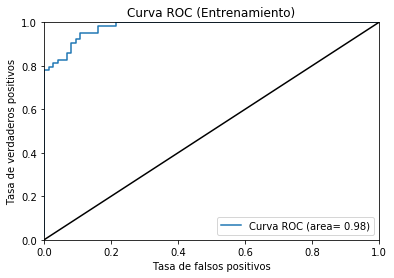

In [139]:
model=linear_model.LinearRegression()
model.fit(X_train,y_train)

pred_train=model.predict(X_train)
confusion_train=confusion_matrix(pred_train,y_train,0.5)

pred_test=model.predict(X_test)
confusion_test=confusion_matrix(pred_test,y_test,0.5)
confusion_test

# Curvas ROC
fpr,tpr,threshold=roc_curve(y_train,pred_train)
roc_auc=auc(fpr,tpr)

print("Área bajo la curva (AUC) para la curva ROC es: %f"%(roc_auc))

plt.clf()
plt.plot(fpr,tpr,label="Curva ROC (area= %0.2f)"%(roc_auc))
plt.plot([0,1],[0,1],"k-")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC (Entrenamiento)")
plt.legend(loc=0)
plt.show()

Área bajo la curva (AUC) para la curva ROC es: 0.848485


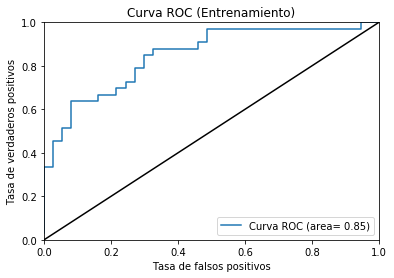

In [140]:
fpr,tpr,threshold=roc_curve(y_test,pred_test)
roc_auc=auc(fpr,tpr)

print("Área bajo la curva (AUC) para la curva ROC es: %f"%(roc_auc))

plt.clf()
plt.plot(fpr,tpr,label="Curva ROC (area= %0.2f)"%(roc_auc))
plt.plot([0,1],[0,1],"k-")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC (Entrenamiento)")
plt.legend(loc=0)
plt.show()